# ASSIGNMENT 08
- Regression models in ML

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

data = pd.read_csv("insurance.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic statistical analysis
print("\nBasic Statistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Convert categorical features to numerical
label_encoders = {}
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Feature engineering (scaling numerical features)
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)

# Identify the best model
best_model = results_df['R2'].idxmax()
print(f"\nThe best model based on R-squared is: {best_model}")

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Basic Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values Check:
age

# ASSIGNMENT 09
- BINARY CLASSIFICATION

First few rows of the dataset:
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  

Basic Statistical Analysis:
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   

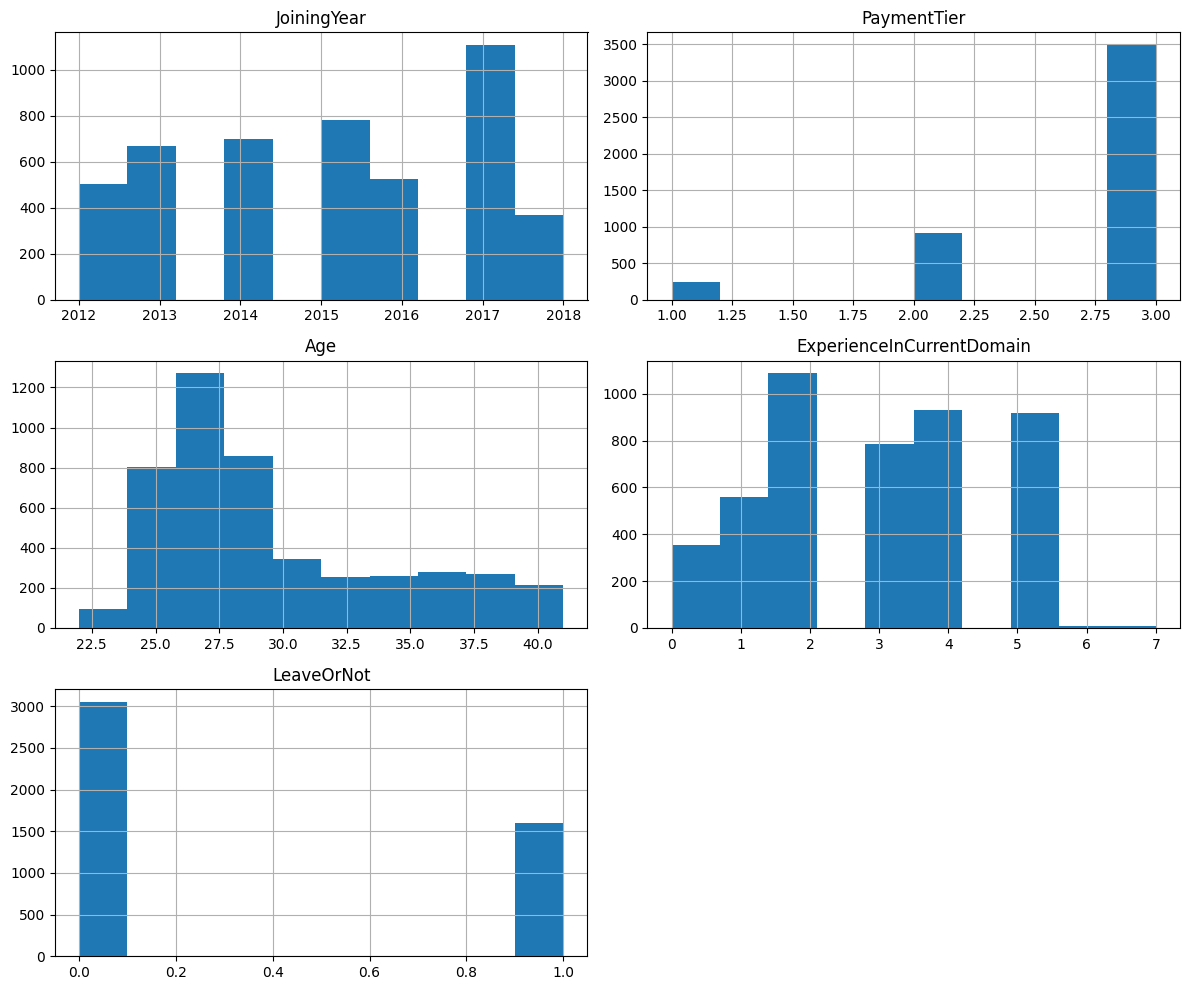

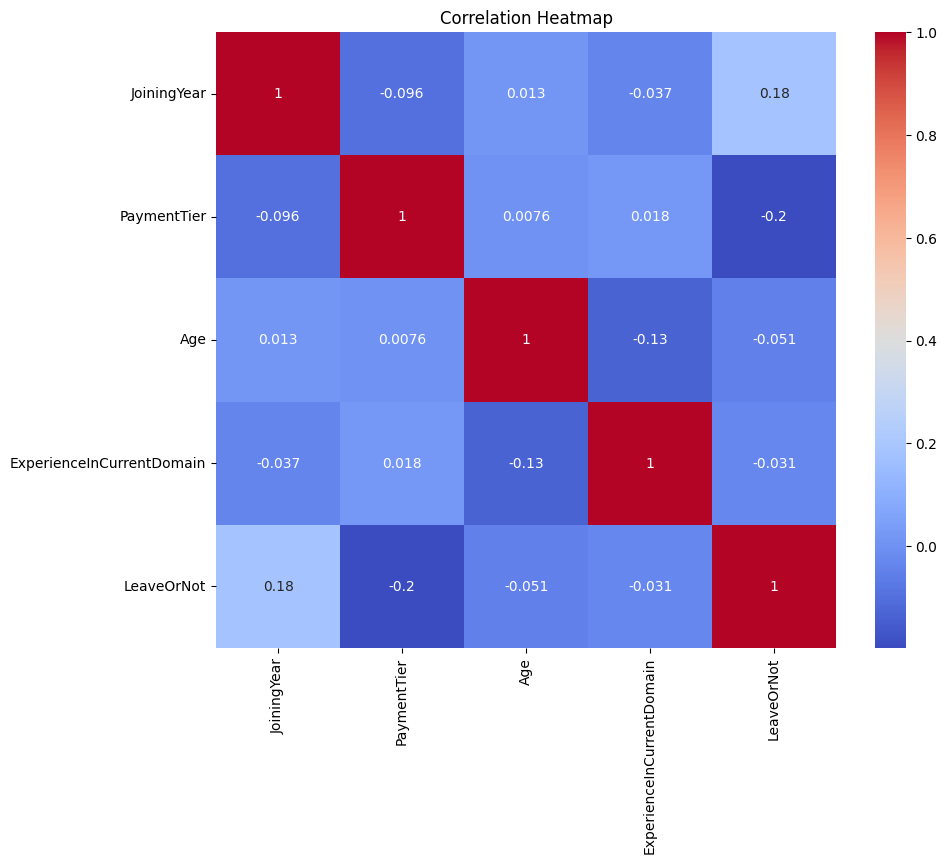

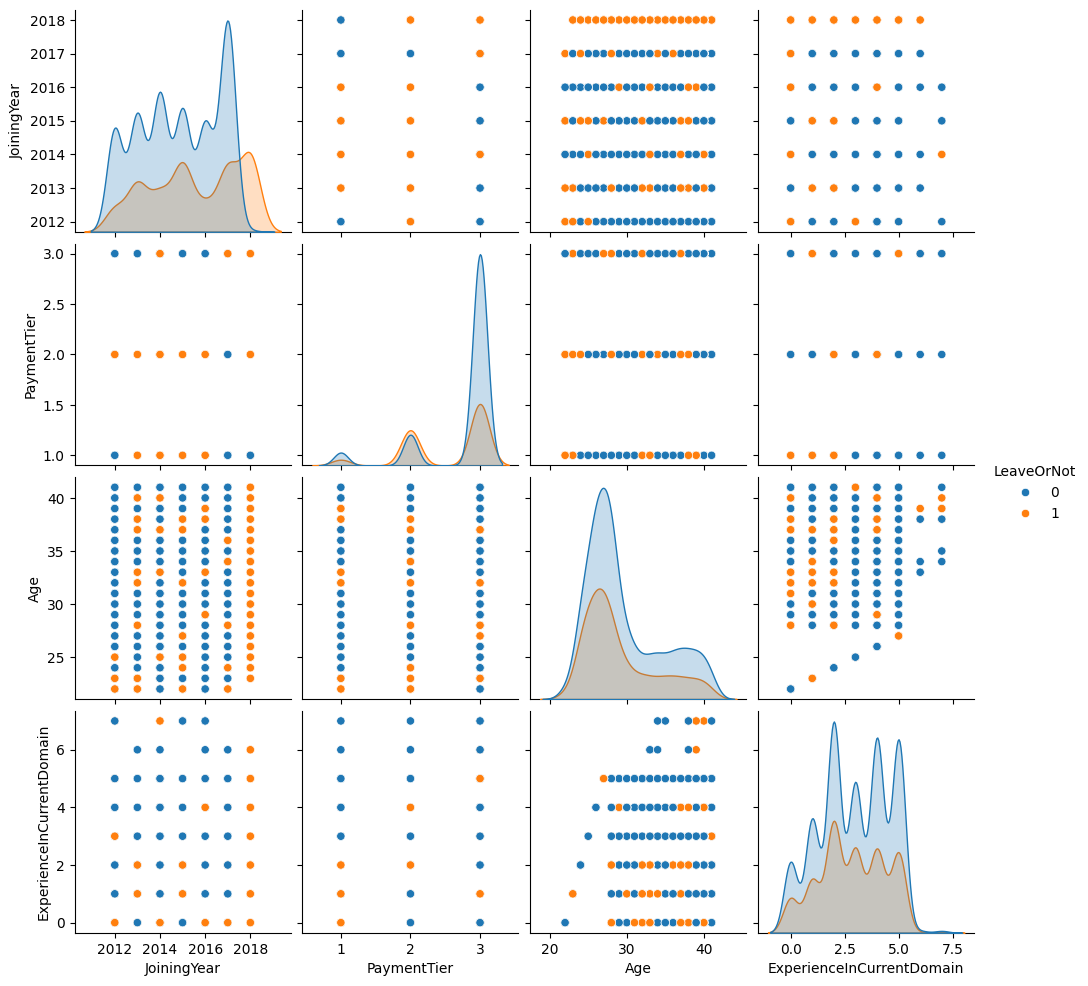

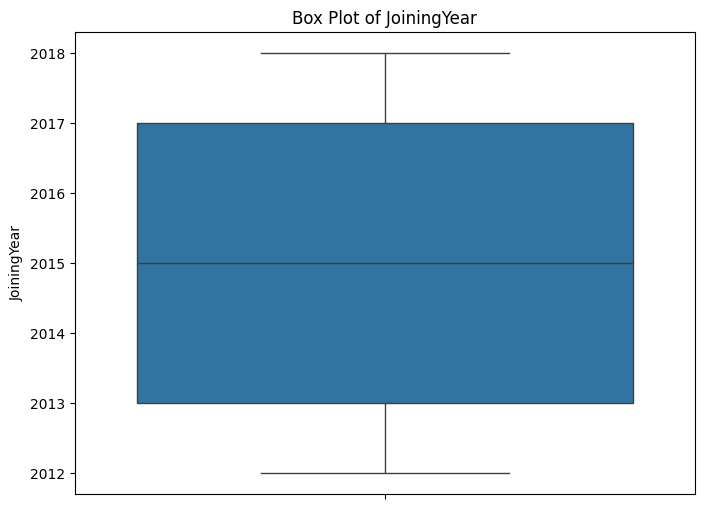

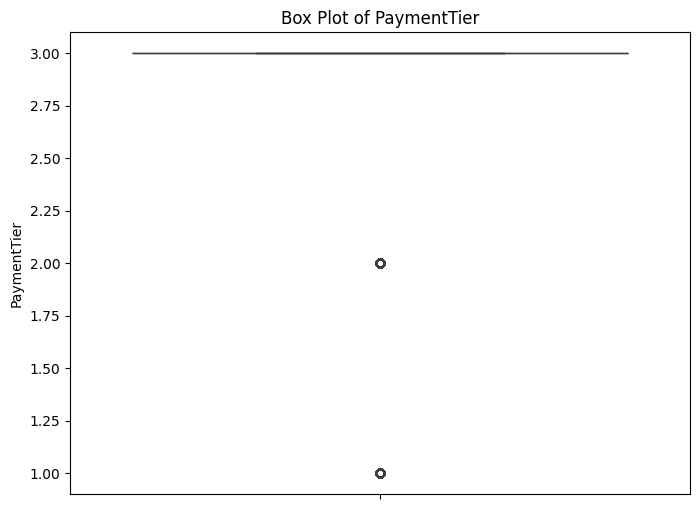

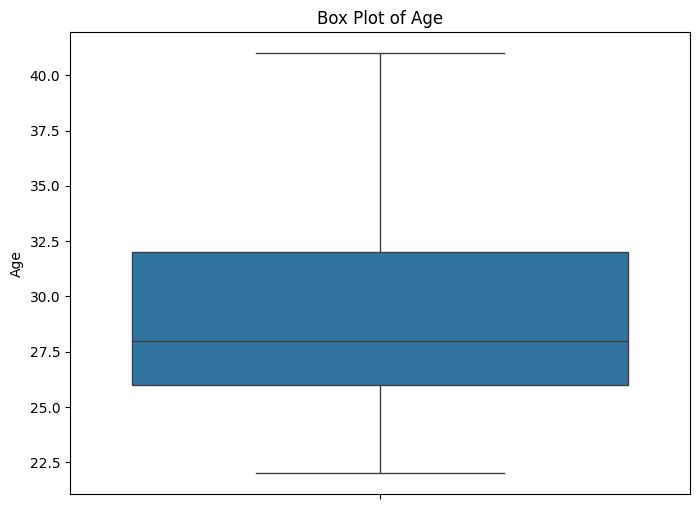

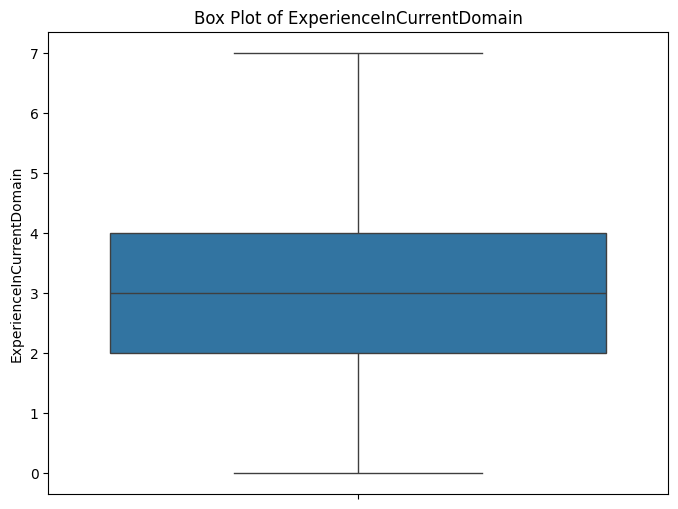

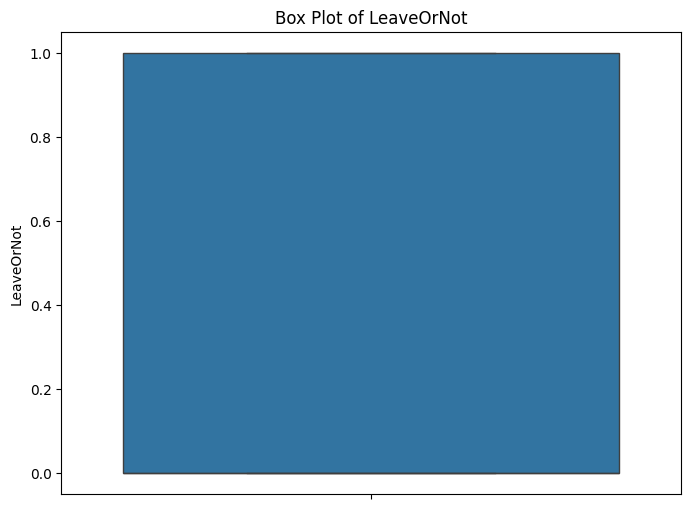


Missing values:
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


TypeError: Cannot convert [['Bachelors' 'Bachelors' 'Bachelors' ... 'Masters' 'Bachelors'
  'Bachelors']
 ['Bangalore' 'Pune' 'New Delhi' ... 'New Delhi' 'Bangalore' 'Bangalore']
 ['Male' 'Female' 'Female' ... 'Male' 'Male' 'Male']
 ['No' 'No' 'No' ... 'No' 'Yes' 'Yes']] to numeric

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Task 1: Data Exploration and Preprocessing
# 1. Load the dataset and display the first few rows
data = pd.read_csv('Employee.csv')
print("First few rows of the dataset:")
print(data.head())

# 2. Perform basic statistical analysis
print("\nBasic Statistical Analysis:")
print(data.describe())

# 3. Visual exploratory data analysis
# i. Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# ii. Correlations
plt.figure(figsize=(10, 8))

#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# Remove non-numeric columns 
numeric_data = data.select_dtypes(include=[np.number]) # ii. Correlations 
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# iii. Pairwise plots
sns.pairplot(data, hue='LeaveOrNot')  # Replace 'Target' with the name of the target column
plt.show()

# iv. Box plots
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=column)
    plt.title(f"Box Plot of {column}")
    plt.show()

# 4. Check for missing values
print("\nMissing values:")
print(data.isnull().sum())
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

# 5. Check for outliers and handle them appropriately
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# 6. Check if the dataset is balanced
print("\nClass distribution:")
print(data['LeaveOrNot'].value_counts())  # Replace 'Target' with the name of the target column

# 7. Split the data into training and testing sets
X = data.drop(columns=['LeaveOrNot'])  # Replace 'Target' with the target column name
y = data['LeaveOrNot']                # Replace 'Target' with the target column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Implement Binary Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# ASSIGNMENT 10
- PRINCIPAL COMPONENT ANALYSIS 


First few rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines

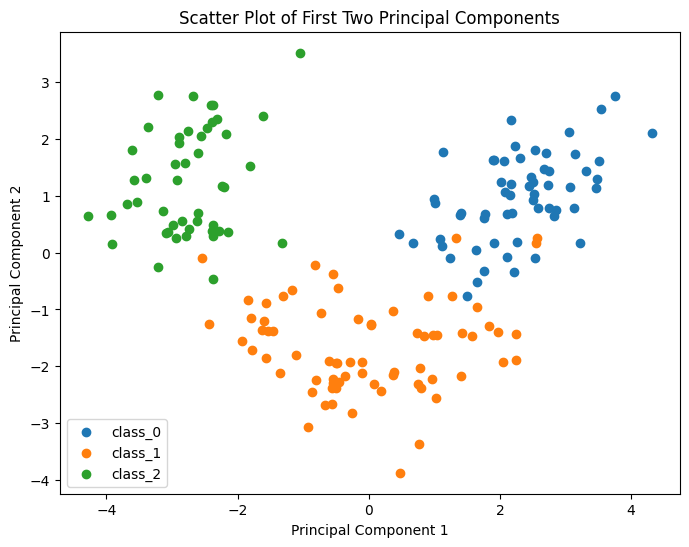


Principal Component 1 Loadings:
alcohol: 0.1443
malic_acid: -0.2452
ash: -0.0021
alcalinity_of_ash: -0.2393
magnesium: 0.1420
total_phenols: 0.3947
flavanoids: 0.4229
nonflavanoid_phenols: -0.2985
proanthocyanins: 0.3134
color_intensity: -0.0886
hue: 0.2967
od280/od315_of_diluted_wines: 0.3762
proline: 0.2868

Principal Component 2 Loadings:
alcohol: 0.4837
malic_acid: 0.2249
ash: 0.3161
alcalinity_of_ash: -0.0106
magnesium: 0.2996
total_phenols: 0.0650
flavanoids: -0.0034
nonflavanoid_phenols: 0.0288
proanthocyanins: 0.0393
color_intensity: 0.5300
hue: -0.2792
od280/od315_of_diluted_wines: -0.1645
proline: 0.3649

Principal Component 3 Loadings:
alcohol: -0.2074
malic_acid: 0.0890
ash: 0.6262
alcalinity_of_ash: 0.6121
magnesium: 0.1308
total_phenols: 0.1462
flavanoids: 0.1507
nonflavanoid_phenols: 0.1704
proanthocyanins: 0.1495
color_intensity: -0.1373
hue: 0.0852
od280/od315_of_diluted_wines: 0.1660
proline: -0.1267

Principal Component 4 Loadings:
alcohol: -0.0179
malic_acid: 0.536

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wine dataset from sklearn
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Task 1: Data Exploration and Preprocessing
# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Perform basic statistical analysis
print("\nBasic Statistical Analysis:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Target', axis=1))
y = df['Target']

# Task 2: Implement PCA
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("\nExplained Variance Ratio:")
print(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Determine number of components to retain (e.g., 95% variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to retain (95% variance): {num_components}")

# Reduce dimensionality using PCA
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X)

# Task 3: Visualization of Principal Components
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
for i, label in enumerate(data.target_names):
    plt.scatter(
        X_pca_reduced[y == i, 0],
        X_pca_reduced[y == i, 1],
        label=label
    )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of First Two Principal Components")
plt.legend()
plt.show()

# Task 4: Interpretation of Results
# Analyze loadings (coefficients)
loadings = pca.components_
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i + 1} Loadings:")
    for feature, loading in zip(data.feature_names, component):
        print(f"{feature}: {loading:.4f}")

# Task 5: Classification Using Principal Components
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Train and evaluate classification models using reduced dimensions
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare with classification using original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name} with Original Features...")
    model.fit(X_train_orig, y_train_orig)
    y_pred_orig = model.predict(X_test_orig)

    # Evaluation metrics
    print(f"\nAccuracy: {accuracy_score(y_test_orig, y_pred_orig)}")
    print("\nClassification Report:")
    print(classification_report(y_test_orig, y_pred_orig))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_orig, y_pred_orig))